# Geopandas 및 관련 라이브러리 설치 가이드

지리적 데이터 분석을 위한 `geopandas`와 관련 라이브러리들을 설치하는 방법입니다.

## 1. Anaconda를 사용하는 경우 (권장)

Anaconda를 사용하면 의존성 문제를 쉽게 해결할 수 있습니다.

```bash
conda install -c conda-forge geopandas
conda install -c conda-forge folium
```

## 2. pip를 사용하는 경우

pip를 사용할 경우, 몇 가지 의존성 라이브러리를 먼저 설치해야 할 수 있습니다.

```bash
pip install numpy pandas matplotlib
pip install geopandas
pip install folium
```

## 3. 특정 OS별 추가 설치 단계

### Windows
Windows에서는 GDAL, Fiona 등의 라이브러리 설치에 문제가 발생할 수 있습니다. 이 경우 Christoph Gohlke의 비공식 Windows 바이너리를 사용할 수 있습니다:
https://www.lfd.uci.edu/~gohlke/pythonlibs/

### macOS
Homebrew를 사용하여 GDAL을 설치할 수 있습니다:
```bash
brew install gdal
```

### Linux
대부분의 Linux 배포판에서는 시스템 패키지 관리자를 통해 GDAL을 설치할 수 있습니다. 예를 들어, Ubuntu의 경우:
```bash
sudo apt-get install libgdal-dev
```

## 4. 설치 확인

설치가 완료되면 Python 환경에서 다음 코드를 실행하여 설치를 확인할 수 있습니다:

```python
import geopandas
import folium

print(geopandas.__version__)
print(folium.__version__)
```

버전 정보가 출력되면 설치가 성공적으로 완료된 것입니다.

## 주의사항

- 가상 환경 사용을 권장합니다. 이는 프로젝트별로 독립적인 Python 환경을 유지하는 데 도움이 됩니다.
- 설치 과정에서 오류가 발생하면, 오류 메시지를 정확히 확인하고 필요한 경우 추가적인 시스템 라이브러리를 설치해야 할 수 있습니다.

In [ ]:
# %pip install geopandas
# %pip install folium

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('../응답_데이터.csv')

<Figure size 1500x1000 with 0 Axes>

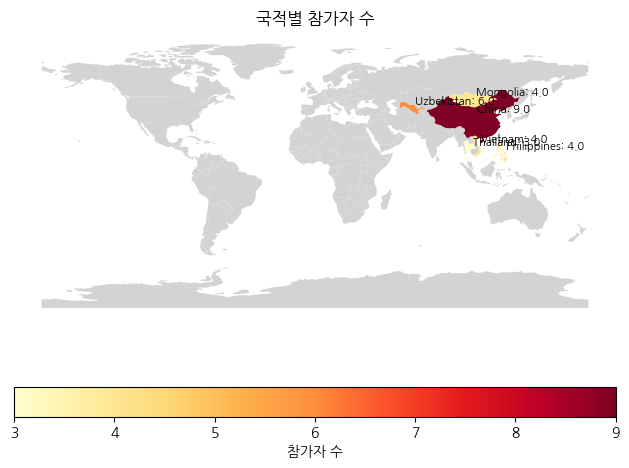

한국 지도가 'korea_map_scores.html' 파일로 저장되었습니다.


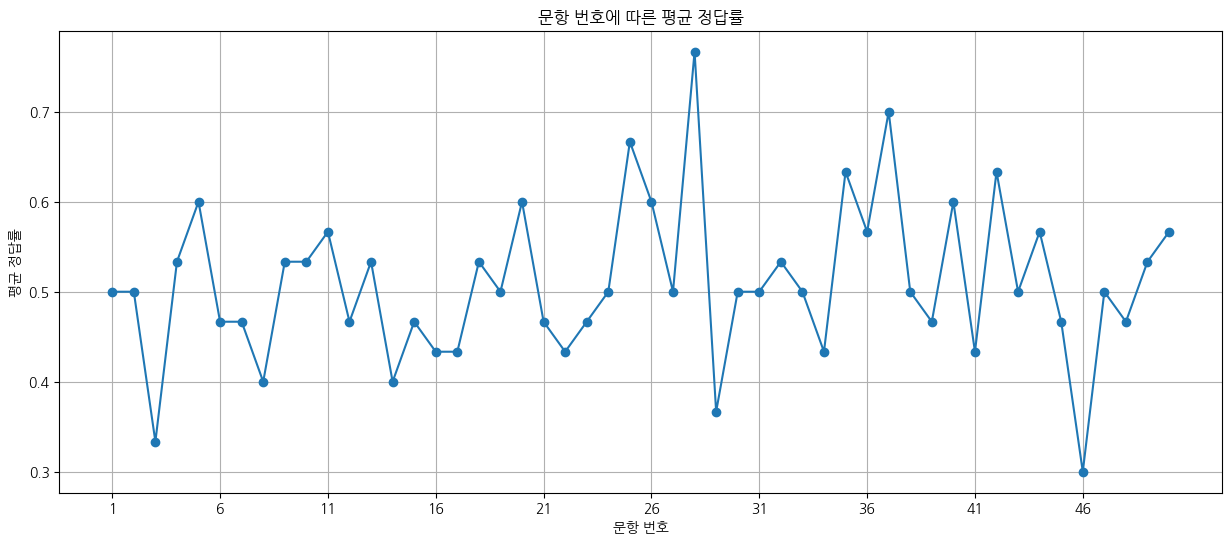

In [6]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import requests
import io

# 데이터 로드
df = pd.read_csv('../응답_데이터.csv')

# 1. 국적별 참가자 수 세계 지도 시각화

# 국적별 참가자 수 계산
nationality_counts = df['국적'].value_counts()

# 세계 지도 데이터 로드 (Natural Earth에서 직접 다운로드)
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)
world = gpd.read_file(io.BytesIO(response.content))

# 국가 이름을 영어로 변환
country_name_map = {
    '우즈베키스탄': 'Uzbekistan',
    '몽골': 'Mongolia',
    '중국': 'China',
    '필리핀': 'Philippines',
    '베트남': 'Vietnam',
    '태국': 'Thailand'
}

nationality_counts = nationality_counts.rename(index=country_name_map)
nationality_counts = nationality_counts.rename('참가자수')

# 세계 지도와 참가자 수 데이터 병합
world = world.merge(nationality_counts, how='left', left_on=['NAME'], right_index=True)

# 지도 생성
plt.figure(figsize=(15, 10))
ax = world.plot(column='참가자수', cmap='YlOrRd', legend=True,
                legend_kwds={'label': '참가자 수', 'orientation': 'horizontal'},
                missing_kwds={'color': 'lightgrey'})

# 국가 이름 표시
for idx, row in world.iterrows():
    if pd.notnull(row['참가자수']):
        plt.annotate(text=f"{row['NAME']}: {row['참가자수']}", xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.title('국적별 참가자 수')
plt.axis('off')
plt.tight_layout()
plt.show()

# 2. 거주지별 평균 점수 한국 지도 시각화

# 거주지별 평균 점수 계산
location_scores = df.groupby('거주지')['점수'].mean()

# 한국 주요 도시의 대략적인 좌표
city_coordinates = {
    '서울': [37.5665, 126.9780],
    '부산': [35.1796, 129.0756],
    '인천': [37.4563, 126.7052],
    '대구': [35.8714, 128.6014],
    '대전': [36.3504, 127.3845],
    '광주': [35.1601, 126.8514],
    '울산': [35.5384, 129.3114],
    '세종': [36.4800, 127.2890],
    '경기': [37.4138, 127.5183],
    '강원': [37.8228, 128.1555],
    '충북': [36.6357, 127.4913],
    '충남': [36.5184, 126.8000],
    '전북': [35.7175, 127.1530],
    '전남': [34.8679, 126.9910],
    '경북': [36.4919, 128.8889],
    '경남': [35.4606, 128.2132],
    '제주': [33.4996, 126.5312]
}

# 한국 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 거주지별 마커 추가
for location, score in location_scores.items():
    if location in city_coordinates:
        folium.CircleMarker(
            location=city_coordinates[location],
            radius=score / 5,  # 점수에 비례하여 원의 크기 조정
            popup=f"거주지: {location}<br>평균 점수: {score:.2f}",
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(m)

# 지도 저장
m.save("korea_map_scores.html")
print("한국 지도가 'korea_map_scores.html' 파일로 저장되었습니다.")

# 3. 추가 분석: OX리스트를 이용한 문항별 정답률 분석
def calculate_correct_rate(ox_string):
    return [1 if x == 'O' else 0 for x in ox_string]

correct_rates = df['OX리스트'].apply(calculate_correct_rate)
correct_rates_df = pd.DataFrame(correct_rates.tolist())
average_correct_rates = correct_rates_df.mean()

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(average_correct_rates) + 1), average_correct_rates, marker='o')
plt.title('문항 번호에 따른 평균 정답률')
plt.xlabel('문항 번호')
plt.ylabel('평균 정답률')
plt.xticks(range(1, len(average_correct_rates) + 1, 5))
plt.grid(True)
plt.show()